#link for datasets
[Link](https://archive.ics.uci.edu/dataset/1031/dataset+for+assessing+mathematics+learning+in+higher+education)

In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score

path_file="C:\\Users\\karth\\PycharmProjects\\pythonProject\\pythonProject\\tutort_class_file\\"

In [25]:
df= pd.read_csv(path_file+"data\\MathE dataset.csv",sep=";",encoding="'cp1252'")
df.columns =df.columns.str.replace(" ","_")
df.columns =df.columns.str.lower()
df.head()

,student_id,student_country,question_id,type_of_answer,question_level,topic,subtopic,keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [26]:
print(df.shape)
df.info()

(9546, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       9546 non-null   int64 
 1   student_country  9546 non-null   object
 2   question_id      9546 non-null   int64 
 3   type_of_answer   9546 non-null   int64 
 4   question_level   9546 non-null   object
 5   topic            9546 non-null   object
 6   subtopic         9546 non-null   object
 7   keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [27]:
df.describe()

,student_id,question_id,type_of_answer
count,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259
std,460.590559,249.244061,0.499018
min,26.000000,77.000000,0.000000
25%,380.000000,323.000000,0.000000
50%,885.000000,428.000000,0.000000
75%,1219.000000,571.000000,1.000000
max,1565.000000,1549.000000,1.000000


In [28]:
##unique values in each column
[(i,len(df[i].unique())) for i in df.columns]

[('student_id', 372),
 ('student_country', 8),
 ('question_id', 833),
 ('type_of_answer', 2),
 ('question_level', 2),
 ('topic', 14),
 ('subtopic', 24),
 ('keywords', 365)]

In [29]:
df[["student_country","student_id","type_of_answer"]].groupby(["student_country"]).count()["type_of_answer"]

student_country
Ireland                300
Italy                 1358
Lithuania             1443
Portugal              5495
Romania                 60
Russian Federation     107
Slovenia               755
Spain                   28
Name: type_of_answer, dtype: int64

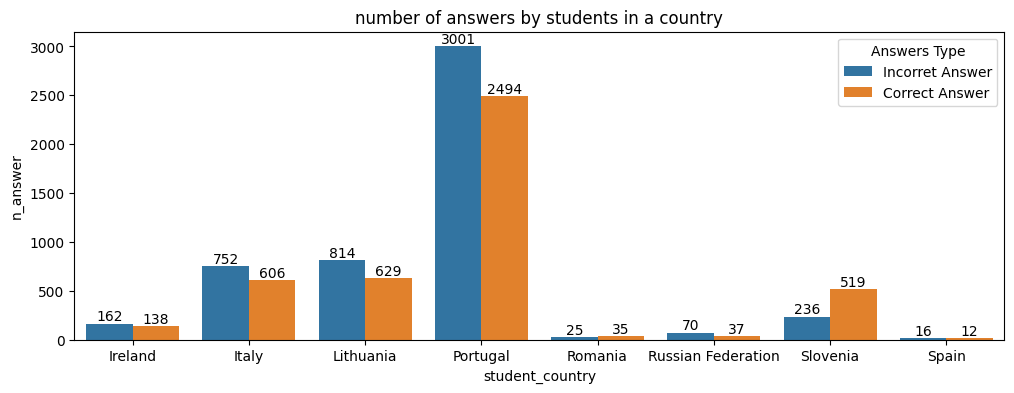

In [30]:

stud = df[["student_country","type_of_answer"]].groupby(["student_country","type_of_answer"]).size().reset_index()
stud.rename(columns ={0:"n_answer"},inplace=True)

plt.figure(figsize=(12,4))
ax = sns.barplot(x="student_country",y="n_answer",hue ="type_of_answer",data =stud)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
handles ,prev_labels = ax.get_legend_handles_labels()
new_labels=["Incorret Answer","Correct Answer"]
ax.legend(title ="Answers Type",handles =handles,labels =new_labels)
plt.title("number of answers by students in a country")
plt.show()

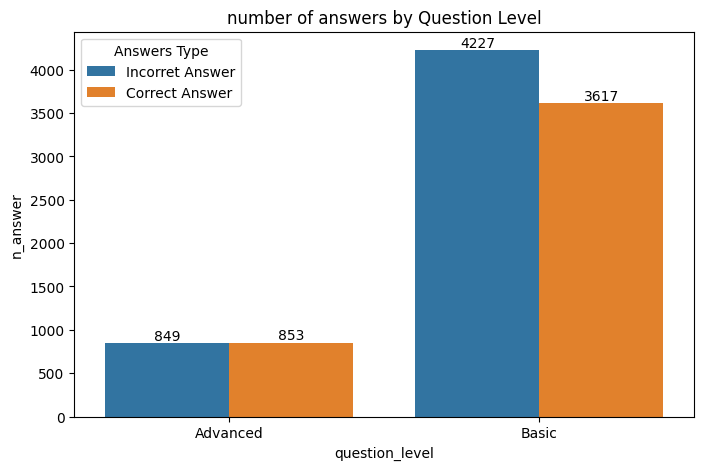

In [31]:
#0 -incorrect answers  , 1 -correct answer
df_group = df[["question_level","type_of_answer"]].groupby(["question_level","type_of_answer"]).size().reset_index()
df_group.rename(columns ={0:"n_answer"},inplace=True)
plt.figure(figsize=(8,5))
ax = sns.barplot(x="question_level",y="n_answer",hue ="type_of_answer",data =df_group)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
handles ,prev_labels = ax.get_legend_handles_labels()
new_labels=["Incorret Answer","Correct Answer"]
ax.legend(title ="Answers Type",handles =handles,labels =new_labels)
plt.title("number of answers by Question Level")
plt.show()


In [32]:
df_group1 =pd.DataFrame(df[["topic","subtopic","type_of_answer"]].groupby(["topic","subtopic"]).sum()["type_of_answer"].reset_index())
df_group1.rename(columns={"type_of_answer":"n_answers"},inplace=True)
df_group1

,topic,subtopic,n_answers
0,Analytic Geometry,Analytic Geometry,175
1,Complex Numbers,Complex Numbers,269
2,Differential Equations,Differential Equations,58
3,Differentiation,Derivatives,113
4,Differentiation,Partial Differentiation,85
5,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...",192
6,Fundamental Mathematics,Elementary Geometry,189
7,Graph Theory,Graph Theory,32
8,Integration,Definite Integrals,11
9,Integration,Double Integration,10


In [33]:
##Encoding categorical data  1
a= pd.get_dummies(df["question_level"],prefix="question_level",dtype=int)
b = pd.get_dummies(df['student_country'],prefix="stud_country", dtype=int)
columns =["topic","subtopic"]
enc = OneHotEncoder(dtype=int,sparse_output=False)
df_enc=  enc.fit_transform(df[columns])
df_enc = pd.DataFrame(df_enc, columns=enc.get_feature_names_out(["topic", "subtopic"]))
df_enc.head(5)

,topic_Analytic Geometry,topic_Complex Numbers,topic_Differential Equations,topic_Differentiation,topic_Fundamental Mathematics,topic_Graph Theory,topic_Integration,topic_Linear Algebra,topic_Numerical Methods,topic_Optimization,...,subtopic_Linear Systems,subtopic_Linear Transformations,subtopic_Matrices and Determinants,subtopic_Nonlinear Optimization,subtopic_Numerical Methods,subtopic_Partial Differentiation,subtopic_Probability,subtopic_Set Theory,subtopic_Statistics,subtopic_Vector Spaces
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df1 =pd.concat((a,b,df_enc,df[["type_of_answer"]]),axis=1)

df1.head(3)

,question_level_Advanced,question_level_Basic,stud_country_Ireland,stud_country_Italy,stud_country_Lithuania,stud_country_Portugal,stud_country_Romania,stud_country_Russian Federation,stud_country_Slovenia,stud_country_Spain,...,subtopic_Linear Transformations,subtopic_Matrices and Determinants,subtopic_Nonlinear Optimization,subtopic_Numerical Methods,subtopic_Partial Differentiation,subtopic_Probability,subtopic_Set Theory,subtopic_Statistics,subtopic_Vector Spaces,type_of_answer
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


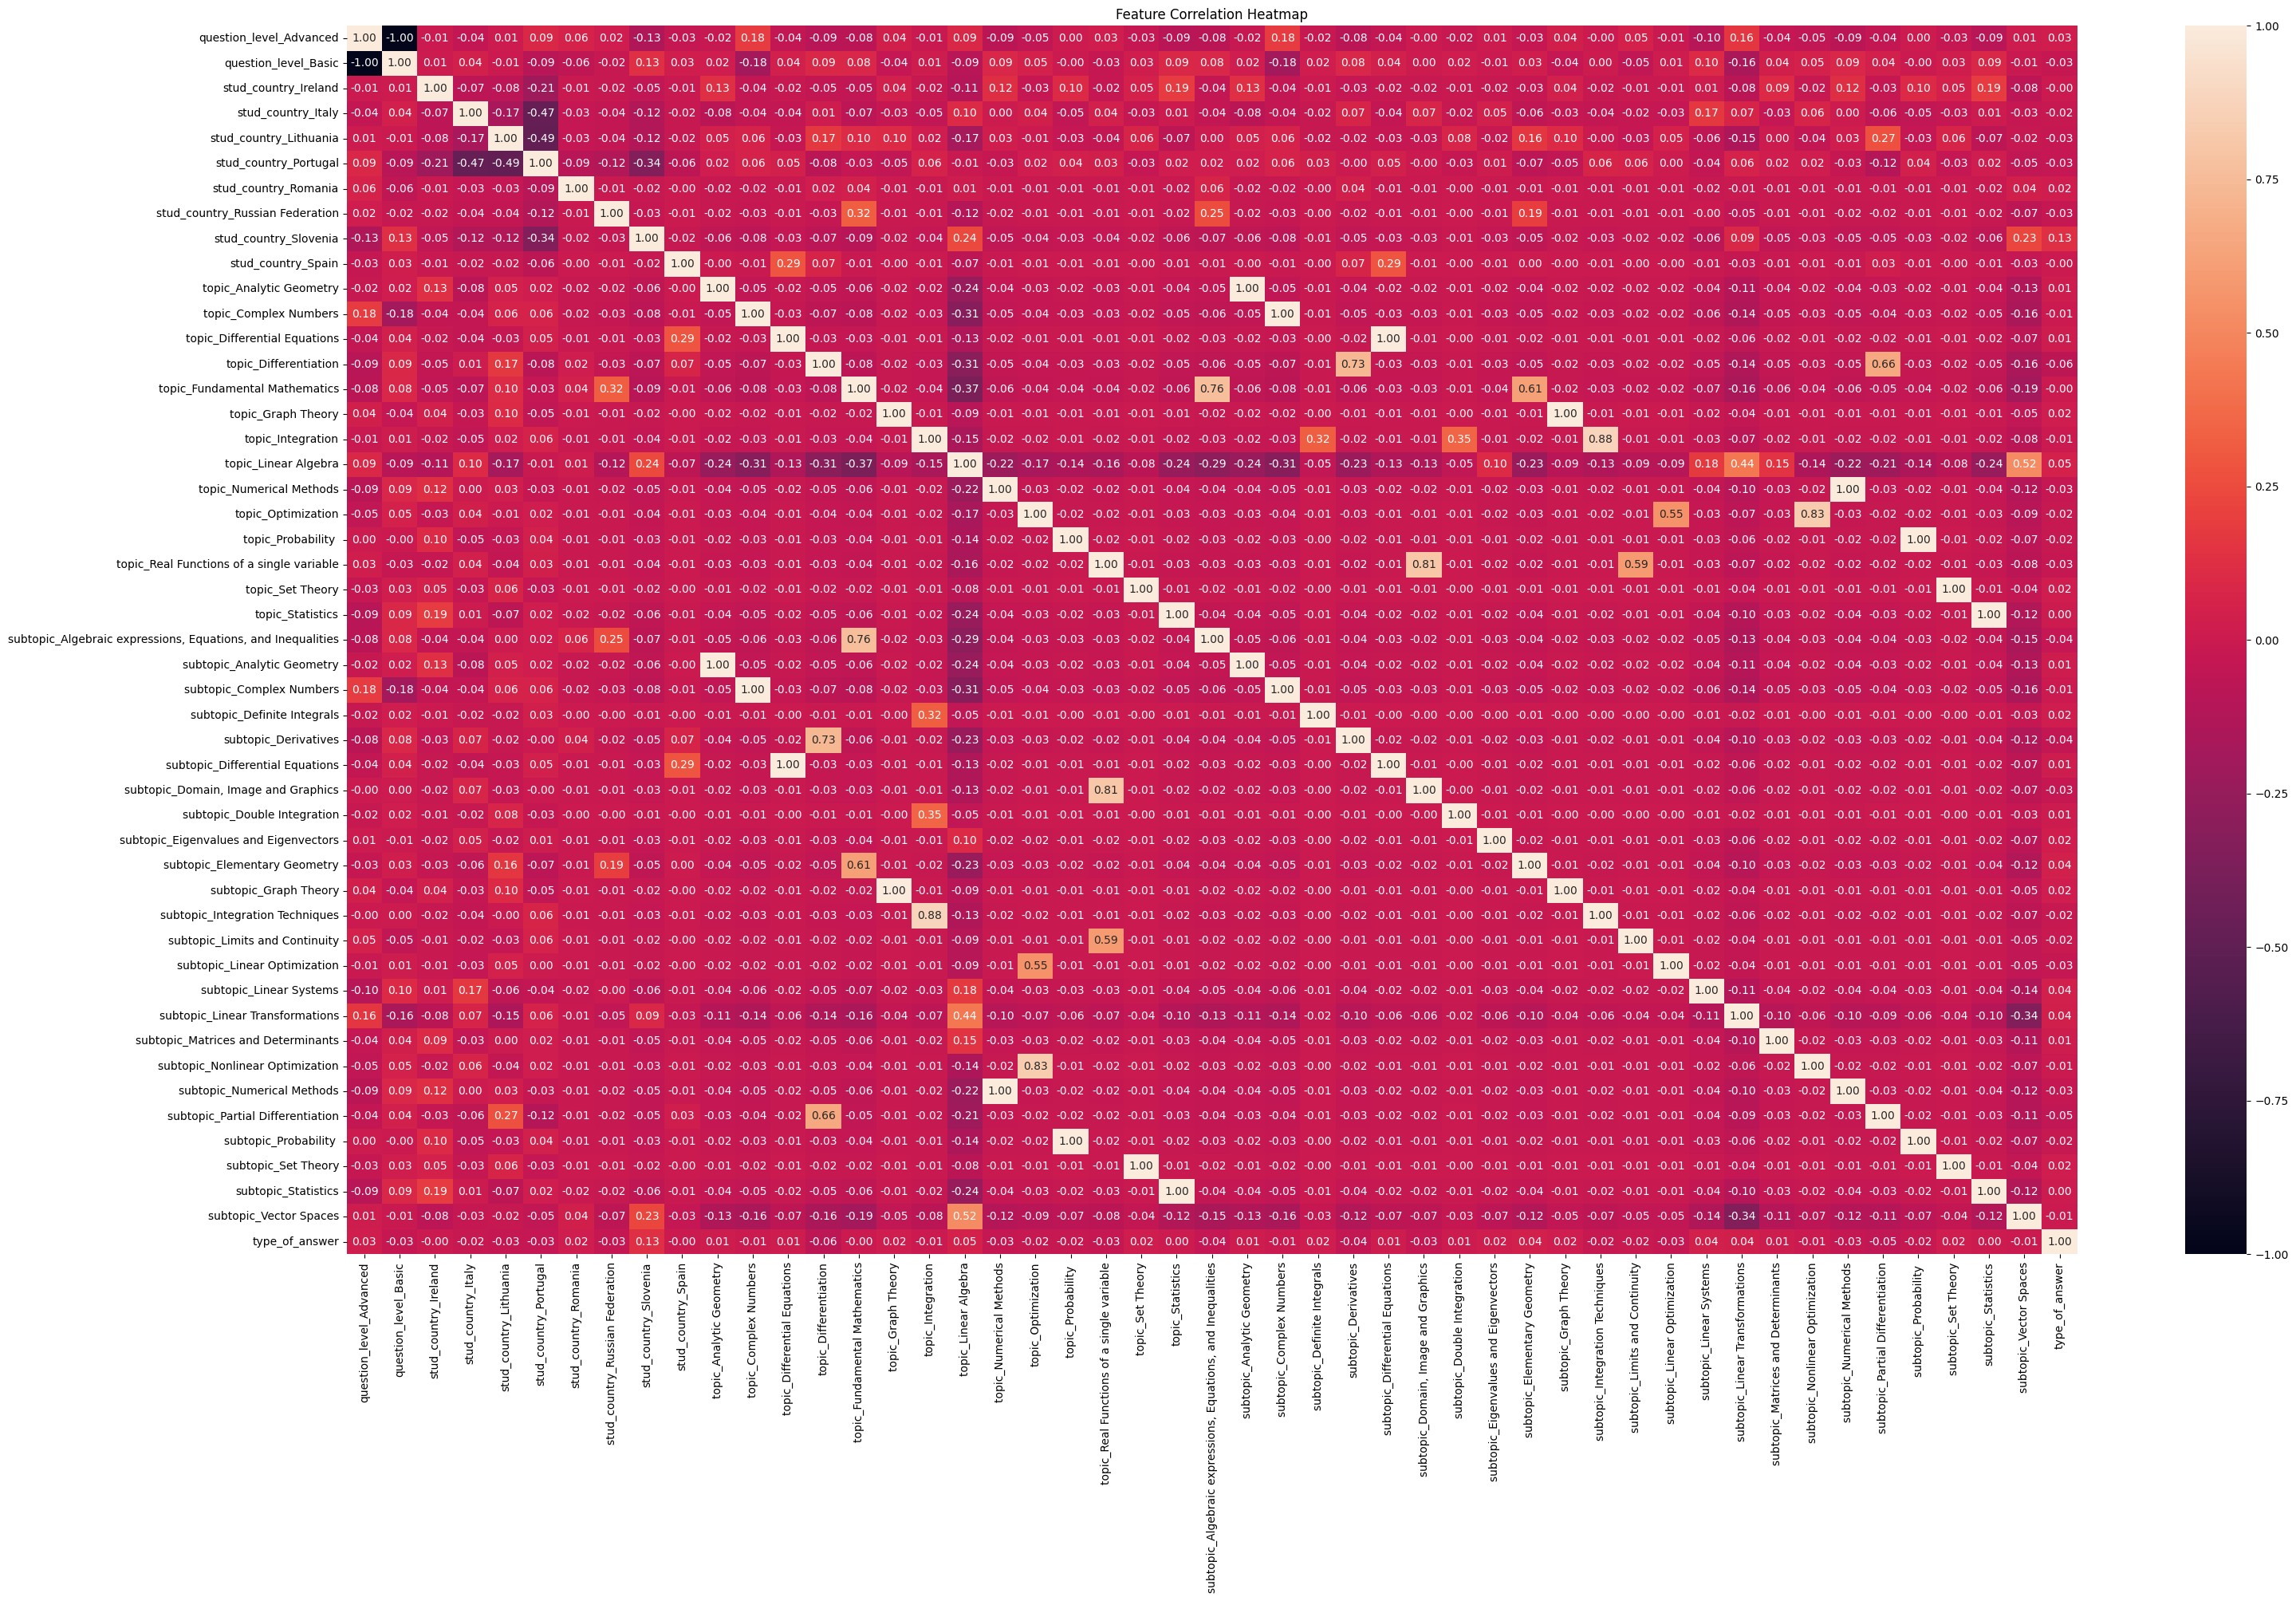

In [35]:
#heatmap for numerical variables
plt.figure(figsize= (35,20))
sns.heatmap(df1.corr(),fmt=".2f",annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
##1:correct_answer 0:incorrect answer
x = df1.drop("type_of_answer",axis=1)
y =  df1["type_of_answer"]
y.value_counts()

type_of_answer
0    5076
1    4470
Name: count, dtype: int64

In [50]:
#splitting the data  and maintaining the balance of 0 and 1 class in split dataset using Stratify

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
y_train.value_counts(normalize=True)

type_of_answer
0    0.531692
1    0.468308
Name: proportion, dtype: float64

In [51]:
x_test.shape

(1910, 48)

In [52]:
#####Training the models

model_name={"Logistic_Regression":LogisticRegression(),"decision_tree":DecisionTreeClassifier(),
          "random_forest":RandomForestClassifier(),"XGBoost":xgb.XGBClassifier(objective="binary:logistic",eval_metric="logloss")}
all_model_conf_mat =[]

for k,md in model_name.items():
    model = md.fit(x_train,y_train)
    pred =model.predict(x_test)
    
    ###Confusion matrix
    conf_mat = confusion_matrix(y_test,pred)
    all_model_conf_mat.append(conf_mat)
    print("model name: ",k)
    print(f"Accuracy : ",accuracy_score(y_test,pred),"precision score: ",precision_score(y_test,pred),
          "Recall score: ",recall_score(y_test,pred))

model name:  Logistic_Regression
Accuracy :  0.5795811518324607 precision score:  0.5926680244399185 Recall score:  0.32550335570469796
model name:  decision_tree
Accuracy :  0.6047120418848168 precision score:  0.6119162640901772 Recall score:  0.4250559284116331
model name:  random_forest
Accuracy :  0.6057591623036649 precision score:  0.6124401913875598 Recall score:  0.42953020134228187
model name:  XGBoost
Accuracy :  0.6052356020942409 precision score:  0.6118210862619808 Recall score:  0.42841163310961966


#### CONFUSION MATRIX For all the models 

In [53]:
model_names = list(model_name.keys())
print(model_names)
all_model_conf_mat =list(all_model_conf_mat)
all_model_conf_mat

['Logistic_Regression', 'decision_tree', 'random_forest', 'XGBoost']


[array([[816, 200],
        [603, 291]], dtype=int64),
 array([[775, 241],
        [514, 380]], dtype=int64),
 array([[773, 243],
        [510, 384]], dtype=int64),
 array([[773, 243],
        [511, 383]], dtype=int64)]

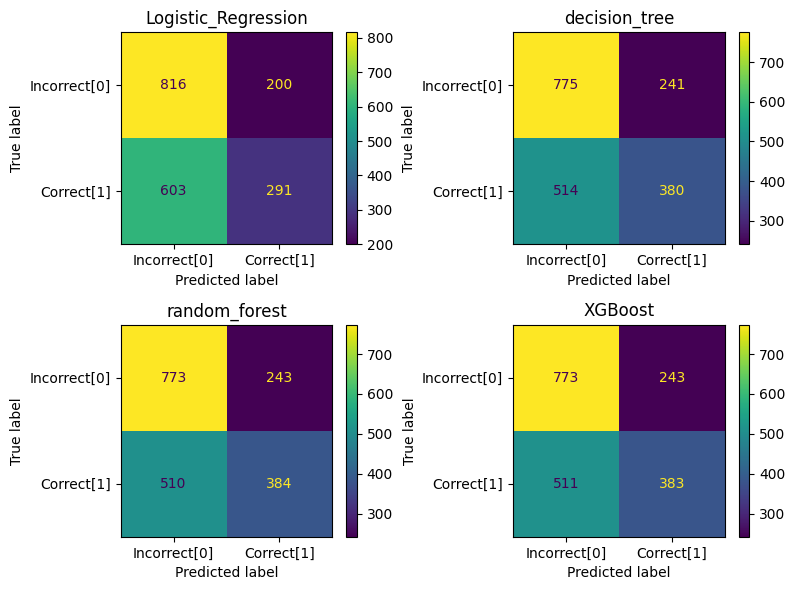

In [54]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
for mdl_name,mdl_conf_mat,ax in zip(model_names,all_model_conf_mat,axes.flatten()):    
    disp = ConfusionMatrixDisplay(mdl_conf_mat,display_labels=["Incorrect[0]","Correct[1]"])
    disp.plot(ax=ax)
    ax.set_title(mdl_name)  
plt.tight_layout()
plt.show()


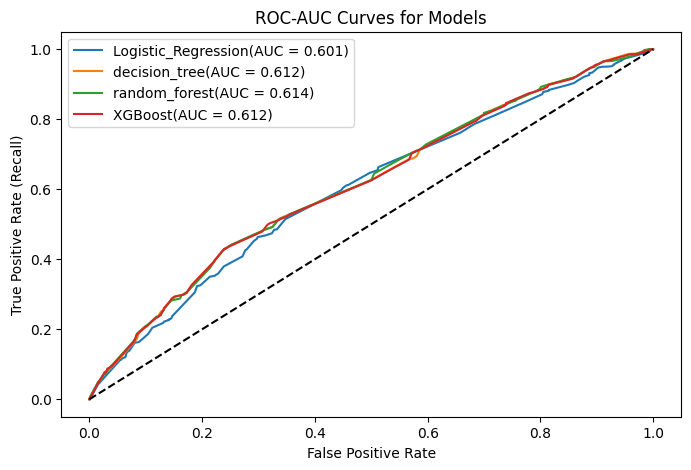

In [55]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 5))

for name, model in model_name.items():
    y_probs = model.predict_proba(x_test)[:, 1]  # Get probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name}(AUC = {roc_auc:.3f})")

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curves for Models")
plt.legend()
plt.show()

#### total_prd_answer_correct on test dataset

* LR  =  816+291 = 1107  =  57.96%
* DT  =  775+380 = 1155  =  60.47%
* RF  =  773+384 = 1157  =  60.58%
* XGB =  773+383 = 1156  =  60.52%

### **SUMMARY** ####
    
The dataset falls in underfitting due to less data.By comparing above calculations and using ROC Curve , **Random Forest model** is performed best in this all